In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import Holt

In [8]:
ele=pd.read_csv(r'..\Datasets\Electric_Production.csv',index_col=0)
ele.index=pd.DatetimeIndex(ele.index)
ele.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


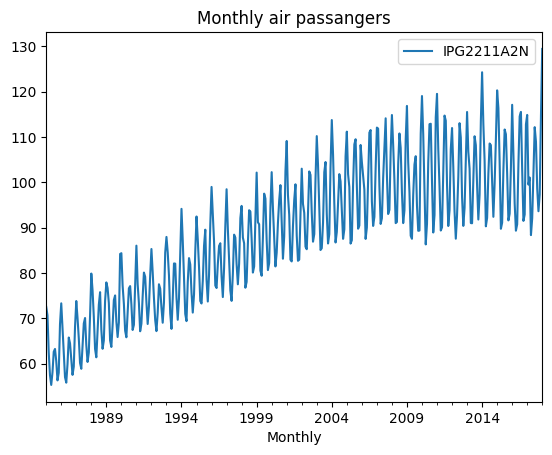

In [9]:
ele.plot()
plt.title("Monthly air passangers")
plt.xlabel("Monthly")
plt.show()

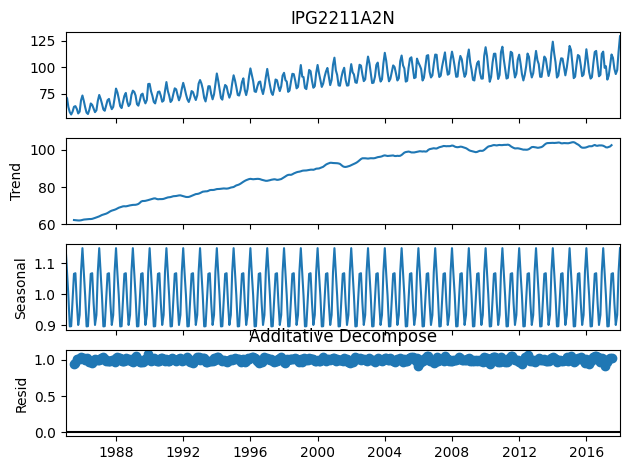

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
series=ele['IPG2211A2N']
results=seasonal_decompose(series,model='mul',period=12)
results.plot()
plt.title("Additative Decompose")
plt.show()

In [17]:
y_train=ele.iloc[:,:-13]
y_test=ele.iloc[:,-13:]

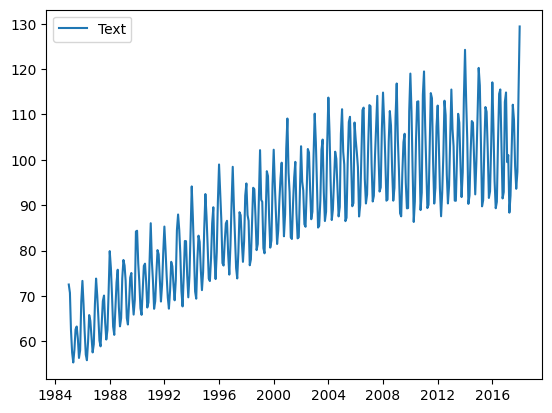

In [18]:
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Text')
plt.legend()
plt.show()


### Electric 


In [12]:
ele=pd.read_csv(r'..\Datasets\Electric_Production.csv',index_col=0)
ele.index=pd.DatetimeIndex(ele.index)
ele.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [24]:
y_train=ele.iloc[:-13,:]
y_test=ele.iloc[-13:,:]
y_train.shape,y_test.shape


((384, 1), (13, 1))

In [ ]:
holt=Holt()
holt.fit(y_train)
holt.predit(y_test)

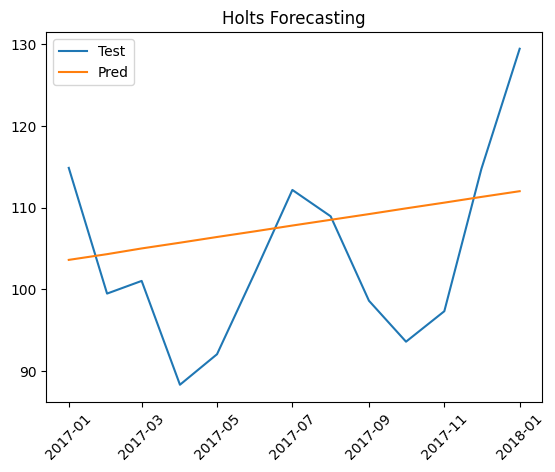

11.04


In [27]:
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error
alpha=0.1
beta=0.7
holt = Holt(y_train)
fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
y_pred=fit1.forecast(len(y_test))
y_pred.index=y_test.index
plt.plot(y_test,label='Test')
plt.plot(y_pred,label='Pred')
error=np.round(root_mean_squared_error(y_test,y_pred),2)
plt.title("Holts Forecasting")
# plt.text(8,875,"RESME"+str(error))
plt.legend()
plt.xticks(rotation=45)
plt.show()
print(error)

In [28]:
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import root_mean_squared_error
alphas=np.linspace(0.01,0.9,20)
betas=np.linspace(0.01,0.9,20)
gamma=np.linspace(0.01,0.9,20)
scores=[]
for a in alphas:
    for b in betas:
        for g in gamma:
            exs=ExponentialSmoothing(y_train,trend='add',seasonal='add')
            fit1=exs.fit(smoothing_level=a,smoothing_trend=b,smoothing_seasonal=g)
            y_pred=fit1.forecast(len(y_test))
            scores.append([a,b,g,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','gamma','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,gamma,root_men_square_error
5981,0.665789,0.900000,0.056842,3.465322
6321,0.712632,0.759474,0.056842,3.668081
6341,0.712632,0.806316,0.056842,3.688809
6681,0.759474,0.665789,0.056842,3.825348
582,0.056842,0.431579,0.103684,3.861361


In [29]:
alphas=np.linspace(0.01,0.9,20)
betas=np.linspace(0.01,0.9,20)
gamma=np.linspace(0.01,0.9,20)
scores=[]
for a in alphas:
    for b in betas:
        for g in gamma:
            exs=ExponentialSmoothing(y_train,trend='add',seasonal='mul')
            fit1=exs.fit(smoothing_level=a,smoothing_trend=b,smoothing_seasonal=g)
            y_pred=fit1.forecast(len(y_test))
            scores.append([a,b,g,root_mean_squared_error(y_test,y_pred)])
score_df=pd.DataFrame(scores,columns=['alpha','beta','gamma','root_men_square_error'])
score_df.sort_values('root_men_square_error',inplace=True)
score_df.head()

,alpha,beta,gamma,root_men_square_error
600,0.056842,0.478421,0.010000,3.546461
5561,0.618947,0.853158,0.056842,3.660837
601,0.056842,0.478421,0.056842,3.668633
582,0.056842,0.431579,0.103684,3.700872
581,0.056842,0.431579,0.056842,3.716163


### Default Auto tunning

In [32]:
exs=ExponentialSmoothing(y_train,trend='add',seasonal='add',seasonal_periods=12)
fit1=exs.fit()
y_pred=fit1.forecast(len(y_test))
root_mean_squared_error(y_test,y_pred)

5.167577163162149

In [33]:
fit1.params

{'smoothing_level': np.float64(0.5219389947003644),
 'smoothing_trend': np.float64(1.5385309017279212e-08),
 'smoothing_seasonal': np.float64(0.2470475300045818),
 'damping_trend': nan,
 'initial_level': np.float64(62.44053865039301),
 'initial_trend': np.float64(0.11000631317209278),
 'initial_seasons': array([10.31661535,  6.51683637,  0.4452377 , -5.25390387, -6.51173489,
        -2.33428827,  2.40795876,  2.10813717, -2.59059719, -6.21957393,
        -3.95192721,  5.61673643]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}